#### [산점도 그래프 ]
- 두개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [1]:
# [1]
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np

In [2]:
# [2] 데이터 준비
F_DATA = r'C:\Users\a\Desktop\EX_PANDAS\data\auto_mpg.csv'

In [3]:
# [3] csv => DataFrame으로 저장
dataDF = pd.read_csv(F_DATA)

In [53]:
dataDF = dataDF.drop(['horsepower','car name'],axis =1)

In [54]:
# - 컬럼별 타입 확인
dataDF.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'weight',
 'acceleration',
 'model year',
 'origin']

In [11]:
# [4] 연비와 관련이 높은 컬럼 즉,변수 확인
# - [4-1] 상관계수 확인 
dataDF.corr(numeric_only=True)['mpg']
corrsr = dataDF.corr(numeric_only=True)['mpg']
round(corrsr['weight'],2)

-0.83

In [62]:
corrsr

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [60]:
corrsr[1]

C:\Users\a\AppData\Local\Temp\ipykernel_15876\919441354.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corrsr[1]


-0.7753962854205539

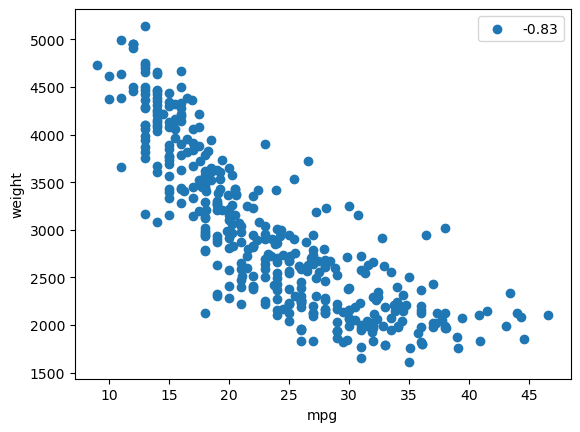

In [15]:
# - [4-2] 시각화 
plt.scatter(x=dataDF['mpg'],y=dataDF['weight'],label = round(corrsr['weight'],2)) 
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_15876\3358709095.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.scatter(x=dataDF['mpg'],y= dataDF[corrsr.index[idx+1]],label = round(corrsr[idx+1],2))


Text(0.5, 0.98, '[mpg & colums]')

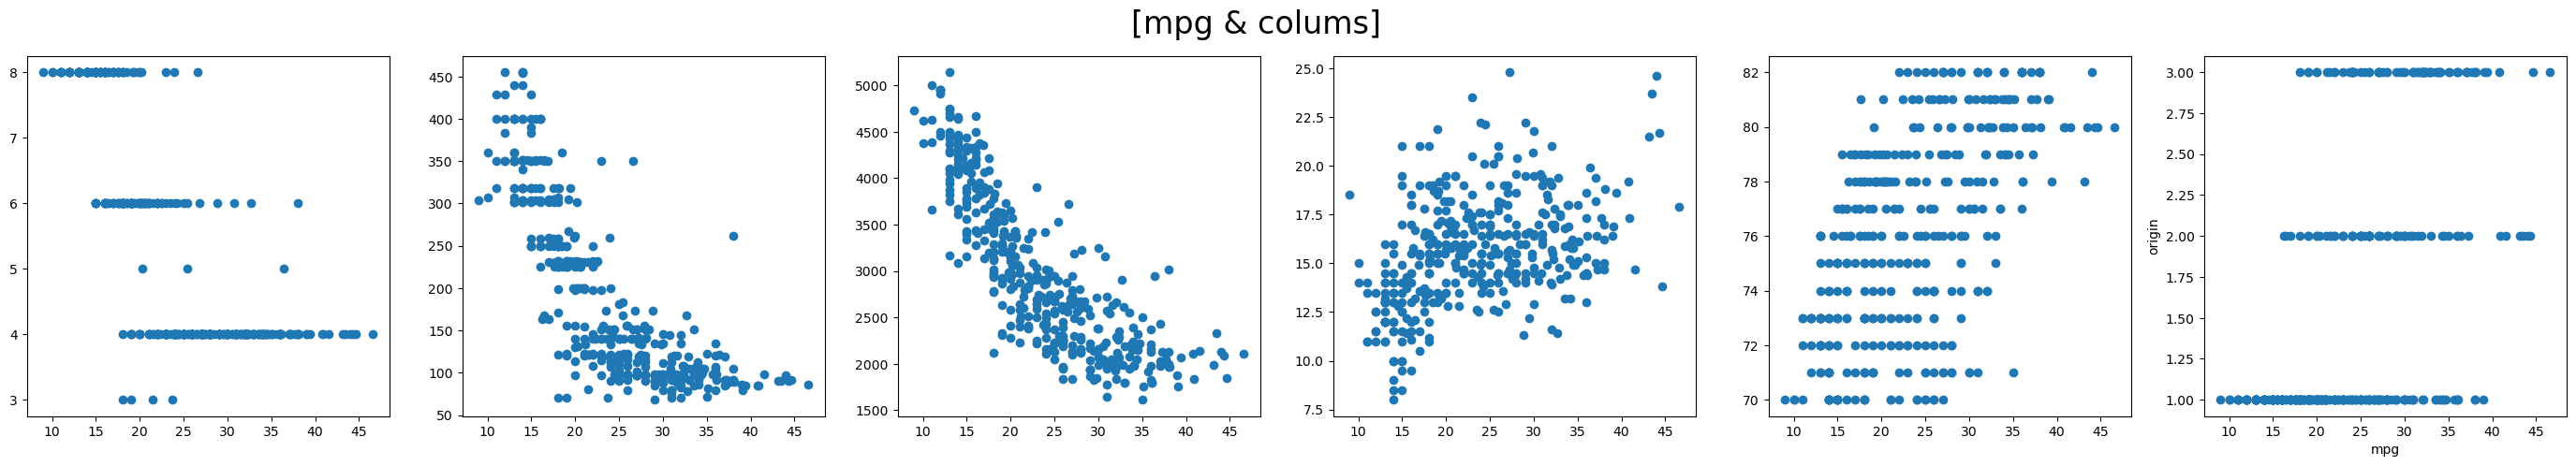

In [68]:
fig = plt.figure(figsize=(35,5))
axs = fig.subplots(1,6,sharex=True)

for idx,ax in enumerate(axs):
    ax.scatter(x=dataDF['mpg'],y= dataDF[corrsr.index[idx+1]],label = round(corrsr[idx+1],2))
    plt.xlabel('mpg')
    plt.ylabel(dataDF.columns.tolist()[idx+1])
fig.suptitle('[mpg & colums]',fontsize =24)


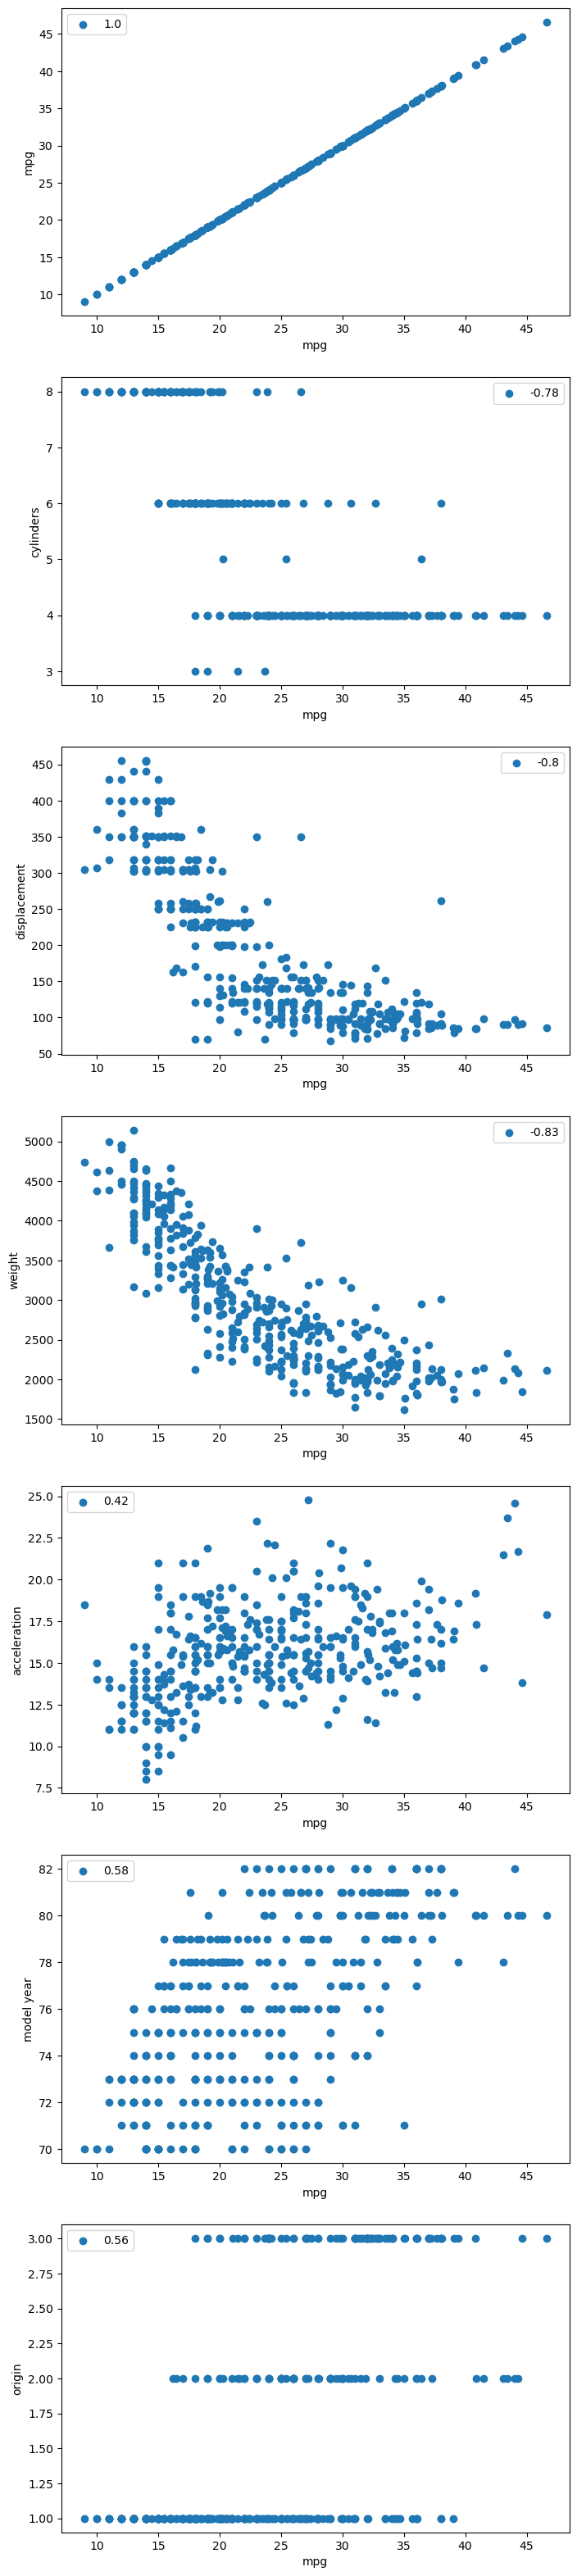

In [81]:
fig = plt.figure(figsize=(8,40))
count = 0
axs = ['ax1','ax2','ax3','ax4','ax5','ax6','ax7']
for i in dataDF.columns.tolist():
    axs[count] = fig.add_subplot(7,1,count+1)
    plt.scatter(x=dataDF['mpg'],y=dataDF[i],label = round(corrsr[i],2))
    plt.xlabel('mpg')
    plt.ylabel(i)
    plt.legend()
    count += 1

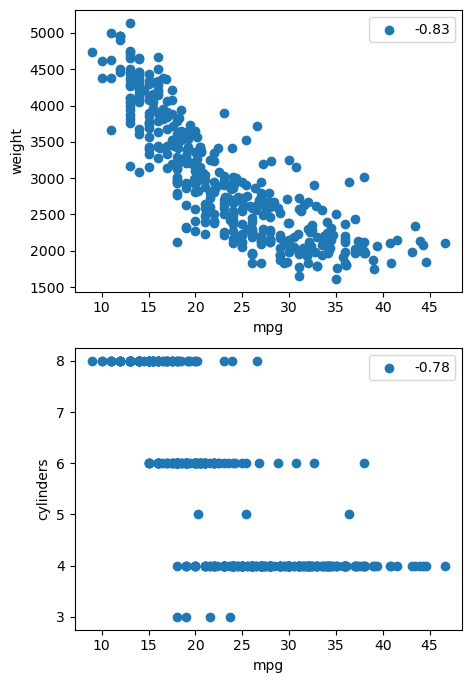

In [27]:
fig = plt.figure(figsize=(5,30))

ax1 = fig.add_subplot(7,1,1)
plt.scatter(x=dataDF['mpg'],y=dataDF['weight'],label = round(corrsr['weight'],2))
plt.xlabel('mpg')
plt.ylabel('weight')
plt.legend()
ax2 = fig.add_subplot(7,1,2)
plt.scatter(x=dataDF['mpg'],y=dataDF['cylinders'],label = round(corrsr['cylinders'],2))
plt.xlabel('mpg')
plt.ylabel('cylinders')
plt.legend()